# Introduction

In this notebook we use deep learning techniques on the dataset we earlier created to create full end-to-end data science pipeline.

# Libraries

In [1]:
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import pandas as pd

## Installation

In [ ]:
# Theano
# Keras

# Image Dataset

In [2]:
fullpath = "../Dataset/image_census_info.csv"
df_img = pd.read_csv(fullpath, sep=',')
df_img.head()

,ImageName,Lat,Long,GEOID,MEDIAN_INCOME
0,Pittsburgh00182.png,40.499737,-80.015609,15000US420032612001,56691.0
1,Pittsburgh00316.png,40.498437,-80.017309,15000US420032612001,56691.0
2,Pittsburgh00317.png,40.498437,-80.015609,15000US420032612001,56691.0
3,Pittsburgh00318.png,40.498437,-80.013909,15000US420032612001,56691.0
4,Pittsburgh00319.png,40.498437,-80.012209,15000US420032612001,56691.0


In [3]:
from PIL import Image

def plot_image(im):
    plt.imshow(np.asarray(im)) 

PNG (640, 640) P


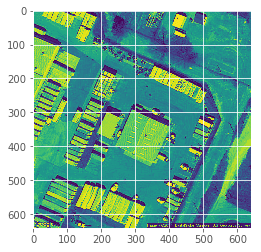

In [4]:
im_pitts_0 = Image.open("../Image/Pittsburgh00182.png")
print im_pitts_0.format, im_pitts_0.size, im_pitts_0.mode
plot_image(im_pitts_0)

## Canonicalizing Images

All the images are of size 640x640. Although the images are all of same resolution, we further slice the image into 9 or 16 equal portions.

- 2x2 split = 320x320 size
- 3x3 split = 213.33x213.33 size
- 4x4 split = 160x160 size

In [5]:
import math

def split_image(im, n):
    """ Splits (640x640) image into n parts. 
        Args: 
            im (PIL Image) : image object to split
            n : number of splits
        Returns: 
            im_splits : list of n image objects (PIL Image)
    """
    
    im = im.convert('RGB')
    
    l = im.size[0]
    h = im.size[1]
    parts = int(math.sqrt(n))
    dist = l/parts

    im_splits = []
    for i in range(parts):
        for j in range(parts):
            im_splits.append(im.crop((j*dist, i*dist, (j+1)*dist, (i+1)*dist)))
    return im_splits

In [6]:
im_list = split_image(im_pitts_0, 9)
len(im_list)

9

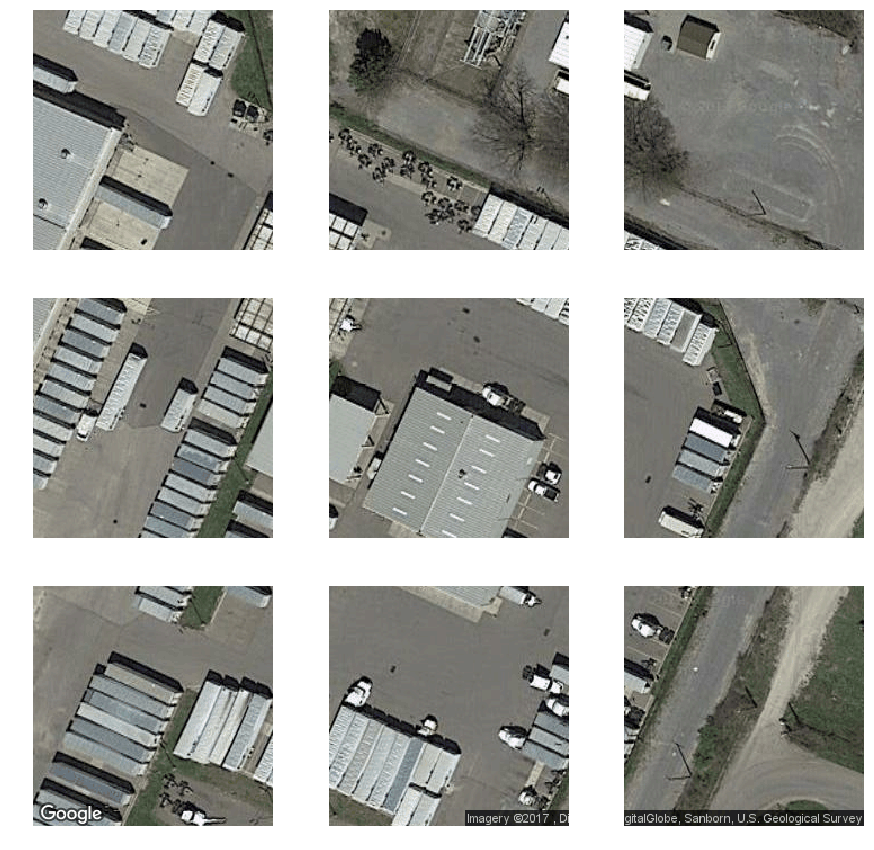

In [7]:
plt.figure(figsize=(15,15))
for i in range(len(im_list)):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plot_image(im_list[i])

# Train / Validate / Test splits for large datasets

- Get the Target Label (Bins of median income for classification)
- Generate the image data matrix that is to be input into VGG

In [8]:
def map_fname_to_income(img,n):
    """ Replicates the income value n times
        Args: 
            img (string) : the image filename
        Returns: 
            label (list) : list of median income
    """
    df_img_input = pd.DataFrame()
    idx = df_img[df_img.ImageName==img].index
    label = [df_img.loc[idx[0],'MEDIAN_INCOME']]*9
    return label
    

def fname_to_vgg_input(fname):
    """ Creates the input for a VGG network from the filename 
        Args: 
            fname (string) : the filename to be parsed
        Returns: 
            list of (numpy ndarray) : a list of n arrays to be passed into the VGG network
    """    
    im = Image.open(fname)
    im = split_image(im, 9)
    
    img_array = []
    
    for idx, img in enumerate(im):
        arr = np.array(img)
        img_array.append(np.rollaxis(arr,2,0))
        
    return img_array

In [ ]:
for i in df_img.iterrows():
    
    img = i[1]['ImageName']
    fname = "../Image/{}".format(img)
    
    print map_fname_to_income(img,9)
    vgg_input = fname_to_vgg_input(fname)
    print vgg_input
    break

# VGG

In [ ]:
# Use a pretrained VGG-16 network to create useful features


# Feature Generation